In [1]:
import os, subprocess, pandas as pd, time
# Folder where Revit exporter is located
path_conv = r"D:\DDC Converter Revit Community\datadrivenlibs"
# The adress of the Revit file on computer
file_path = r"D:\RVT_projects\2022 rstadvancedsampleproject.rvt"

# Convert a Revit project to an open fotmat
process = subprocess.Popen([os.path.join(path_conv, "RvtExporter.exe"), file_path], cwd = path_conv)
process.wait() # waiting for process to be completed

0

In [2]:
# Read the converted Excel file
output_file = file_path[:-4] + "_rvt.xlsx"
df = pd.read_excel(output_file)
df.head(5)

,ID,Name,Category : String,Design Option : String,Sequence Number : Integer,Name : String,Workset : String,Keynote : String,IFC Predefined Type : String,Export to IFC As : String,...,Poisson ratio : Double,Young modulus : Double,Electrical Resistivity : Double,Reflectivity : Double,Porosity : Double,Permeability : Double,Transmits Light : Boolean,Emissivity : Double,Thermally Treated : Boolean,ReadOnly Parameters
0,0.0,NaN,OST_Phases,None,2.0,New Construction,Project Standards,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Category, Design Option, Family Name, Name, Se..."
1,2.0,NaN,OST_Phases,None,1.0,Existing,Project Standards,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Category, Design Option, Family Name, Name, Se..."
2,24.0,NaN,OST_Materials,None,NaN,Default,Project Standards,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Category, Color, Comments, Cost, Description, ..."
3,25.0,NaN,OST_Materials,None,NaN,Default Wall,Project Standards,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Category, Color, Comments, Cost, Description, ..."
4,26.0,NaN,OST_Materials,None,NaN,Default Roof,Project Standards,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Category, Color, Comments, Cost, Description, ..."


In [3]:
# Ipdate column names to remove storage type in parameter
df.columns = [col.split(' : ')[0] for col in df.columns]
QTO_group = df.groupby('Type Name')['Volume'].sum().reset_index().query("Volume != 0")
QTO_group

,Type Name,Volume
29,160mm Concrete With 50mm Metal Deck,14.212314
39,2000 x 2000 x 900mm,142.862880
56,300 x 600mm,7.890945
67,400 x 800mm,299.733321
68,400mm Diameter,72.380206
73,450mm,104.203544
78,500mm Diameter,141.354540
87,600 x 900,50.856825
92,750mm,7.731140
94,800 x 1800 x 900mm,82.944000


In [4]:
# Save the filter data to a new Excel file
QTO_group.to_excel(r"D:\RVT_projects\QTO_group2.xlsx")

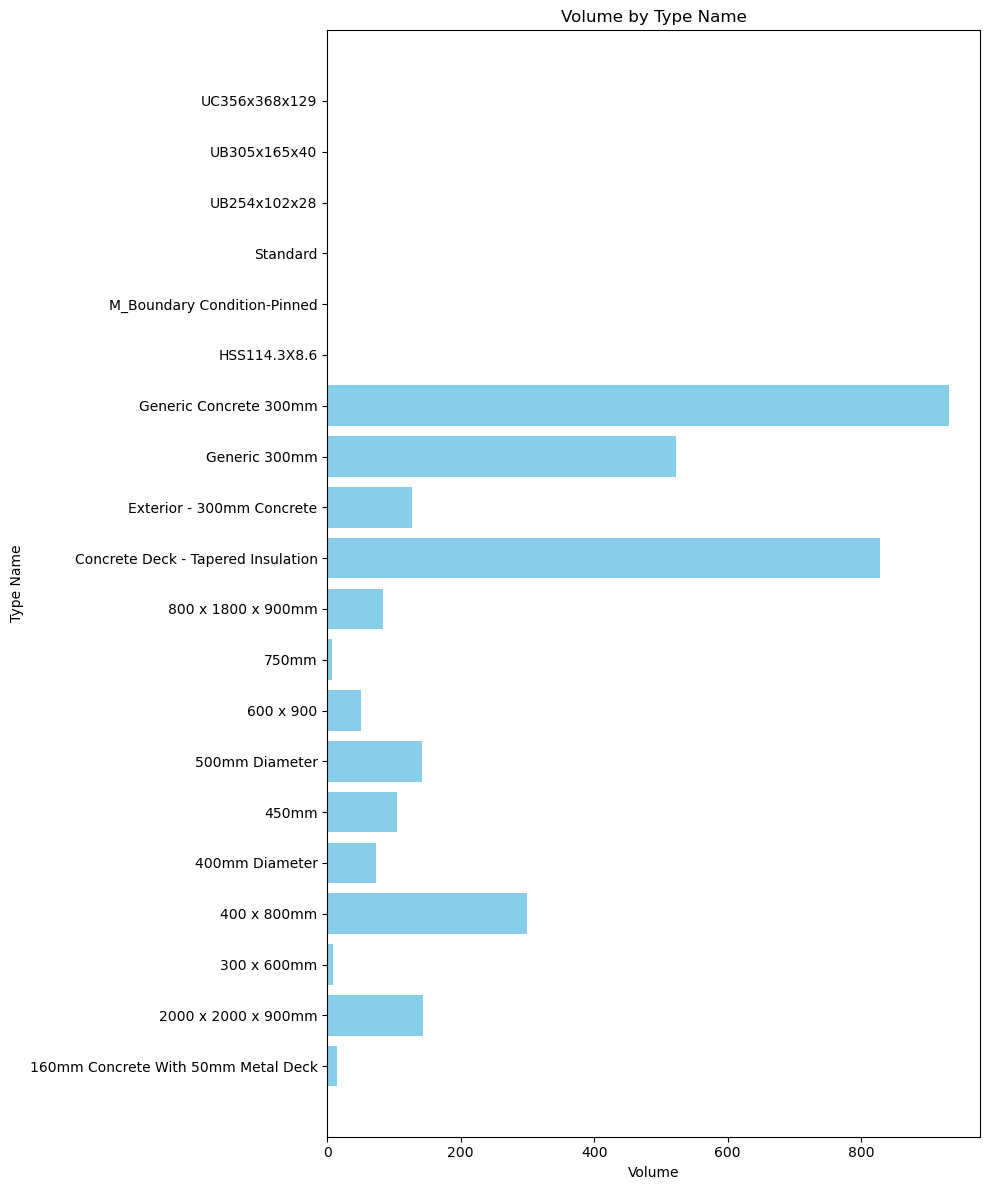

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,12))
plt.barh(QTO_group["Type Name"], QTO_group["Volume"], color = "skyblue")
plt.xlabel('Volume'); plt.ylabel('Type Name'); plt.title('Volume by Type Name'); plt.tight_layout()